In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Tiles and Tokens
# Token Lists
fixed_tokens = {
    (0, 2): "A",
    (0, 4): "B",
    (2, 0): "C",
    (2, 2): "D",
    (2, 4): "E",
    (2, 6): "F",
    (4, 0): "G",
    (4, 2): "H",
    (4, 4): "I",
    (4, 6): "J",
    (6, 2): "K",
    (6, 4): "L"
}

movable_tokens = [
    "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X"
]

token_names = {
    "A": "Golden Fleece",
    "B": "Pandora’s Box",
    "C": "Ariadne’s Thread",
    "D": "Winged Sandals",
    "E": "Trident of Poseidon",
    "F": "Helm of Hades",
    "G": "Shield of Athena",
    "H": "Labyrinth Key",
    "I": "Golden Apple",
    "J": "Horn of Plenty",
    "K": "Book of Prophecies",
    "L": "Eagle of Zeus",
    "M": "Oracle of Delphi",
    "N": "Medusa’s Head",
    "O": "Ambrosia",
    "P": "Golden Bow of Artemis",
    "Q": "Harp of Orpheus",
    "R": "Cup of Dionysus",
    "S": "Scepter of Hera",
    "T": "Fire of Prometheus",
    "U": "Chariot of Helios",
    "V": "Gorgon’s Shield",
    "W": "Caduceus of Hermes",
    "X": "Pomegranate of Persephone"
}

# Tile List
movable_tiles = [
    {"type": "T", "token": "M"},
    {"type": "T", "token": "N"},
    {"type": "T", "token": "O"},
    {"type": "T", "token": "P"},
    {"type": "T", "token": "Q"},
    {"type": "T", "token": "R"},
    {"type": "corner", "token": "S"},
    {"type": "corner", "token": "T"},
    {"type": "corner", "token": "U"},
    {"type": "corner", "token": "V"},
    {"type": "corner", "token": "W"},
    {"type": "corner", "token": "X"},
    {"type": "corner", "token": None},
    {"type": "corner", "token": None},
    {"type": "corner", "token": None},
    {"type": "corner", "token": None},
    {"type": "corner", "token": None},
    {"type": "corner", "token": None},
    {"type": "corner", "token": None},
    {"type": "corner", "token": None},
    {"type": "corner", "token": None},
    {"type": "corner", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None},
    {"type": "straight", "token": None}
]

In [3]:
class Tile:
    def __init__(self, type, orientation=0, token=None):
        self.type = type
        self.orientation = orientation
        self.token = token

    def rotate(self):
        self.orientation = (self.orientation + 90) % 360

    def get_open_paths(self): # specify meaning of orientation for each tile type
        if self.type == 'straight':
            if self.orientation in [0, 180]:
                return {'left': True, 'right': True, 'up': False, 'down': False}
            else:
                return {'left': False, 'right': False, 'up': True, 'down': True}
        elif self.type == 'corner':
            if self.orientation == 0:
                return {'left': True, 'right': False, 'up': True, 'down': False}
            elif self.orientation == 90:
                return {'left': False, 'right': True, 'up': True, 'down': False}
            elif self.orientation == 180:
                return {'left': False, 'right': True, 'up': False, 'down': True}
            elif self.orientation == 270:
                return {'left': True, 'right': False, 'up': False, 'down': True}
        elif self.type == 'T':
            if self.orientation == 0:
                return {'left': True, 'right': True, 'up': True, 'down': False}
            elif self.orientation == 90:
                return {'left': False, 'right': True, 'up': True, 'down': True}
            elif self.orientation == 180:
                return {'left': True, 'right': True, 'up': False, 'down': True}
            elif self.orientation == 270:
                return {'left': True, 'right': False, 'up': True, 'down': True}
        else:
            return {'left': False, 'right': False, 'up': False, 'down': False}

    def __repr__(self):
        return f"Tile({self.type}, {self.orientation}, {self.token})"

In [4]:
class Board:
    def __init__(self, size=7):
        self.size = size
        self.tiles = self._initialize_tiles()
        self.fixed_tiles = self._place_fixed_tiles()


    def _initialize_tiles(self):
        random.shuffle(movable_tiles)

        tile_objects = []
        tile_index = 0

        for row in range(self.size):
            row_tiles = []
            for col in range(self.size):
                if (row, col) in self._fixed_positions():
                    row_tiles.append(None)  # Placeholder for fixed tiles
                else:
                    tile_info = movable_tiles[tile_index]
                    tile_type = tile_info["type"]
                    token = tile_info["token"]
                    orientation = random.choice([0, 90, 180, 270])
                    row_tiles.append(Tile(type=tile_type, orientation=orientation, token=token))
                    tile_index += 1
            tile_objects.append(row_tiles)

        # Set the leftover tile as the excess tile
        self.excess_tile = Tile(type="straight", orientation=random.choice([0, 90, 180, 270]))

        return tile_objects


    def _place_fixed_tiles(self):
        fixed_tiles = {
            (0, 0): Tile(type='corner', orientation=180),
            (0, 2): Tile(type='T', orientation=180, token="A"),
            (0, 4): Tile(type='T', orientation=180, token="B"),
            (0, 6): Tile(type='corner', orientation=270),
            (2, 0): Tile(type='T', orientation=90, token="C"),
            (2, 2): Tile(type='T', orientation=90, token="D"),
            (2, 4): Tile(type='T', orientation=180, token="E"),
            (2, 6): Tile(type='T', orientation=270, token="F"),
            (4, 0): Tile(type='T', orientation=90, token="G"),
            (4, 2): Tile(type='T', orientation=0, token="H"),
            (4, 4): Tile(type='T', orientation=270, token="I"),
            (4, 6): Tile(type='T', orientation=270, token="J"),
            (6, 0): Tile(type='corner', orientation=90),
            (6, 2): Tile(type='T', orientation=0, token="K"),
            (6, 4): Tile(type='T', orientation=0, token="L"),
            (6, 6): Tile(type='corner', orientation=0),
        }
        
        for pos, tile in fixed_tiles.items():
            self.tiles[pos[0]][pos[1]] = tile
        return fixed_tiles
    

    def _fixed_positions(self):
        return {(0, 0), (0, 2), (0, 4), (0, 6), (2, 0), (2, 2), (2, 4), (2, 6), (4, 0), (4, 2), (4, 4), (4, 6), (6, 0), (6, 2), (6, 4), (6, 6)}
    

    def push_tile(self, direction, position):
        exit_position = None
        if direction in ['left', 'right'] and position in [1, 3, 5]:
            exit_position = self._push_row(direction, position)
        elif direction in ['up', 'down'] and position in [1, 3, 5]:
            exit_position = self._push_column(direction, position)
        else:
            print("Invalid push. Only rows and columns 1, 3, and 5 can be pushed.")
        return exit_position

    def _push_row(self, direction, row):
        if direction == 'left':
            new_excess_tile = self.tiles[row][0]
            for col in range(self.size - 1):
                self.tiles[row][col] = self.tiles[row][col + 1]
            self.tiles[row][self.size - 1] = self.excess_tile
            self.excess_tile = new_excess_tile
            return (row, self.size - 1)
        elif direction == 'right':
            new_excess_tile = self.tiles[row][self.size - 1]
            for col in range(self.size - 1, 0, -1):
                self.tiles[row][col] = self.tiles[row][col - 1]
            self.tiles[row][0] = self.excess_tile
            self.excess_tile = new_excess_tile
            return (row, 0)

    def _push_column(self, direction, col):
        if direction == 'up':
            new_excess_tile = self.tiles[0][col]
            for row in range(self.size - 1):
                self.tiles[row][col] = self.tiles[row + 1][col]
            self.tiles[self.size - 1][col] = self.excess_tile
            self.excess_tile = new_excess_tile
            return (self.size - 1, col)
        elif direction == 'down':
            new_excess_tile = self.tiles[self.size - 1][col]
            for row in range(self.size - 1, 0, -1):
                self.tiles[row][col] = self.tiles[row - 1][col]
            self.tiles[0][col] = self.excess_tile
            self.excess_tile = new_excess_tile
            return (0, col)
    

    # Board debugging and visualization
    def visualize_board(self):
        fig, ax = plt.subplots()
        ax.set_xticks(np.arange(-0.5, self.size, 1))
        ax.set_yticks(np.arange(-0.5, self.size, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(which='both')

        for row in range(self.size):
            for col in range(self.size):
                tile = self.tiles[row][col]
                if tile is not None:
                    rect = plt.Rectangle((col - 0.5, row - 0.5), 1, 1, fill=None, edgecolor='black')
                    ax.add_patch(rect)
                    
                    # Draw paths based on open paths
                    paths = tile.get_open_paths()
                    if paths['left']:
                        ax.plot([col-0.5, col], [row, row], color='blue')
                    if paths['right']:
                        ax.plot([col, col+0.5], [row, row], color='blue')
                    if paths['up']:
                        ax.plot([col, col], [row-0.5, row], color='blue')
                    if paths['down']:
                        ax.plot([col, col], [row, row+0.5], color='blue')
                    
                    # Draw token if present
                    if tile.token:
                        ax.text(col, row, tile.token, ha='center', va='center', fontsize=12, color='red')

        plt.gca().invert_yaxis()
        plt.show()

    def visualize_excess_tile(self):
        fig, ax = plt.subplots()
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.axis('off')

        tile = self.excess_tile
        rect = plt.Rectangle((0, 0), 1, 1, fill=None, edgecolor='red')
        ax.add_patch(rect)
        paths = tile.get_open_paths()
        if paths['left']:
            ax.plot([0, 0.5], [0.5, 0.5], color='blue')
        if paths['right']:
            ax.plot([0.5, 1], [0.5, 0.5], color='blue')
        if paths['up']:
            ax.plot([0.5, 0.5], [0.5, 1], color='blue')
        if paths['down']:
            ax.plot([0.5, 0.5], [0, 0.5], color='blue')

        # Draw token if present
        if tile.token:
            ax.text(0.5, 0.5, tile.token, ha='center', va='center', fontsize=12, color='red')

        plt.gca().invert_yaxis()
        plt.show()


    # Token debugging
    def print_tile_info(self):
        tile_info = []
        for row in range(self.size):
            for col in range(self.size):
                tile = self.tiles[row][col]
                if tile is not None:
                    tile_info.append((tile.type, row, col, tile.token))
        
        # Sort by tile type
        tile_info.sort(key=lambda x: x[0])
        
        for info in tile_info:
            print(f"Type: {info[0]}, Position: ({info[1]}, {info[2]}), Token: {info[3]}")

Initial Board:


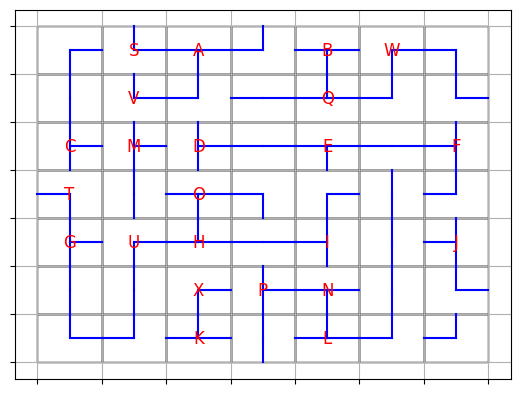

Excess Tile:


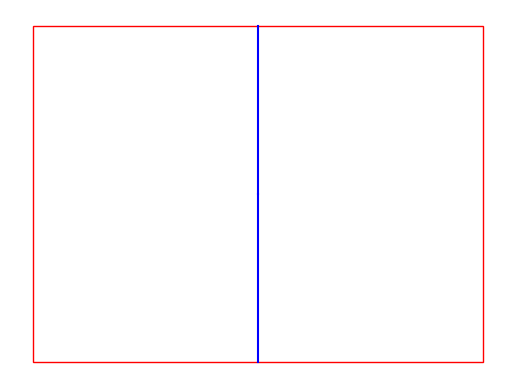

Pushing row 1 to the right:


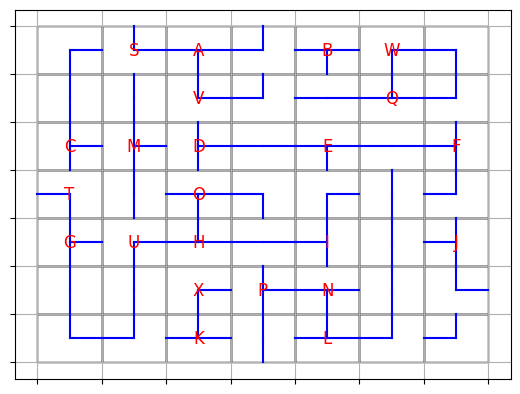

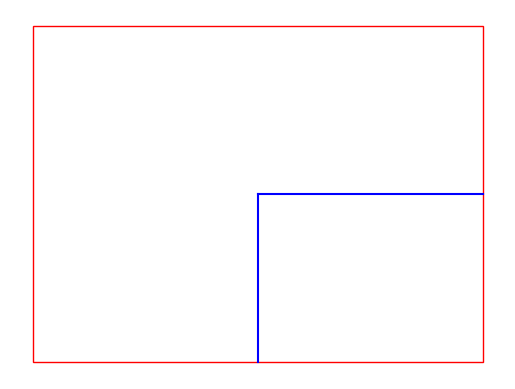

Pushing column 1 down:


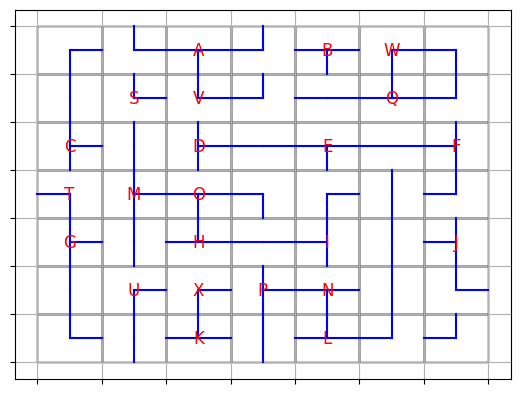

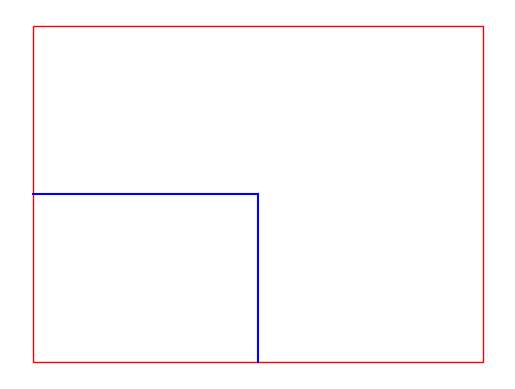

Pushing column 2 up:
Invalid push. Only rows and columns 1, 3, and 5 can be pushed.


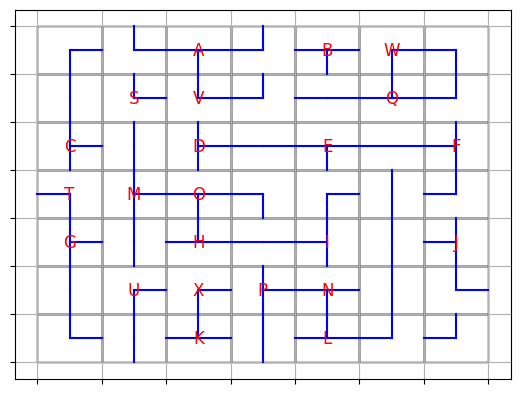

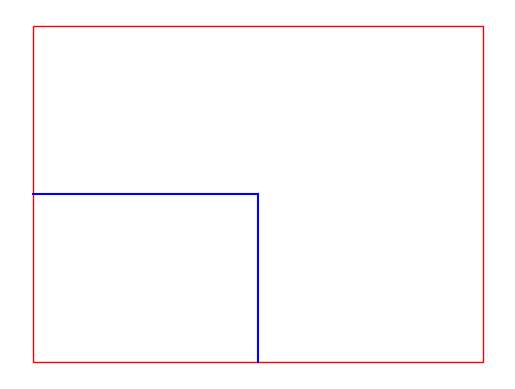

In [6]:
board = Board()
print("Initial Board:")
board.visualize_board()

print("Excess Tile:")
board.visualize_excess_tile()

print("Pushing row 1 to the right:")
board.push_tile('right', 1)
board.visualize_board()
board.visualize_excess_tile()

print("Pushing column 1 down:")
board.push_tile('down', 1)
board.visualize_board()
board.visualize_excess_tile()

print("Pushing column 2 up:")
board.push_tile('up', 2)
board.visualize_board()
board.visualize_excess_tile()


In [7]:
board.print_tile_info()


Type: T, Position: (0, 2), Token: A
Type: T, Position: (0, 4), Token: B
Type: T, Position: (1, 5), Token: Q
Type: T, Position: (2, 0), Token: C
Type: T, Position: (2, 2), Token: D
Type: T, Position: (2, 4), Token: E
Type: T, Position: (2, 6), Token: F
Type: T, Position: (3, 1), Token: M
Type: T, Position: (3, 2), Token: O
Type: T, Position: (4, 0), Token: G
Type: T, Position: (4, 2), Token: H
Type: T, Position: (4, 4), Token: I
Type: T, Position: (4, 6), Token: J
Type: T, Position: (5, 3), Token: P
Type: T, Position: (5, 4), Token: N
Type: T, Position: (6, 2), Token: K
Type: T, Position: (6, 4), Token: L
Type: corner, Position: (0, 0), Token: None
Type: corner, Position: (0, 1), Token: None
Type: corner, Position: (0, 3), Token: None
Type: corner, Position: (0, 5), Token: W
Type: corner, Position: (0, 6), Token: None
Type: corner, Position: (1, 1), Token: S
Type: corner, Position: (1, 2), Token: V
Type: corner, Position: (1, 3), Token: None
Type: corner, Position: (1, 6), Token: None
T

Pushing column 1 down:


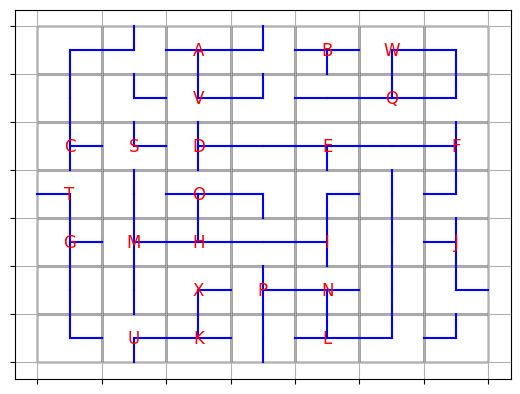

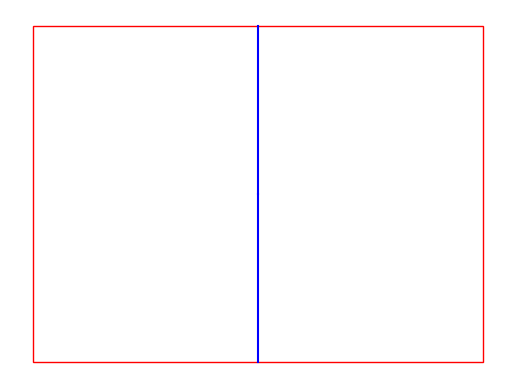

Type: T, Position: (0, 2), Token: A
Type: T, Position: (0, 4), Token: B
Type: T, Position: (1, 5), Token: Q
Type: T, Position: (2, 0), Token: C
Type: T, Position: (2, 2), Token: D
Type: T, Position: (2, 4), Token: E
Type: T, Position: (2, 6), Token: F
Type: T, Position: (3, 2), Token: O
Type: T, Position: (4, 0), Token: G
Type: T, Position: (4, 1), Token: M
Type: T, Position: (4, 2), Token: H
Type: T, Position: (4, 4), Token: I
Type: T, Position: (4, 6), Token: J
Type: T, Position: (5, 3), Token: P
Type: T, Position: (5, 4), Token: N
Type: T, Position: (6, 2), Token: K
Type: T, Position: (6, 4), Token: L
Type: corner, Position: (0, 0), Token: None
Type: corner, Position: (0, 1), Token: None
Type: corner, Position: (0, 3), Token: None
Type: corner, Position: (0, 5), Token: W
Type: corner, Position: (0, 6), Token: None
Type: corner, Position: (1, 1), Token: None
Type: corner, Position: (1, 2), Token: V
Type: corner, Position: (1, 3), Token: None
Type: corner, Position: (1, 6), Token: Non

In [8]:
print("Pushing column 1 down:")
board.push_tile('down', 1)
board.visualize_board()
board.visualize_excess_tile()

board.print_tile_info()
